In [70]:
import pandas as pd
import numpy as np
import re
from scipy import stats
from matplotlib import pyplot as plt

# More detailed documentation can be found here
#        https://mimic.mit.edu/docs/iii/tables/
# For simplicity, we are only loading 
#        admissions - data from admission of a patient, links to patients on subject_id
#        patients   - data defining a patient
df_admin = pd.read_csv('data/ADMISSIONS.csv')
df_patients = pd.read_csv('data/PATIENTS.csv')

#column names to lowercase
df_admin.columns = df_admin.columns.str.lower()
df_patients.columns = df_patients.columns.str.lower()

#drop columns to simplify for first analysis
df_admin = df_admin.drop(columns=['row_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime',
                                 'admission_type', 'admission_location', 'discharge_location', 
                                 'edregtime', 'edouttime', 'has_chartevents_data'])
df_patients = df_patients.drop(columns=['row_id', 'dod_ssn'])
df = pd.merge(df_admin, df_patients, on="subject_id") 

#print("Admissions:\n",df_admin.count(),"\n")
#print("Patients:\n", df_patients.count(),"\n")
#print("Merged:\n", df.count())

#print(df_admin.count())
#print(df_patients.count())
#print(df['language'].value_counts())
#print(df['religion'].value_counts())
#print(df['marital_status'].value_counts())
#print(df['ethnicity'].value_counts())
#print(df['gender'].value_counts())
#print(df['insurance'].value_counts())

In [40]:
#df.loc[:,df.columns != 'b'] # removes col b
print(df.hospital_expire_flag.sum())
#print(df.DOD.unique())
print(df.dod_hosp.isna().sum())

#df_patients.hist(column='expire_flag')
#df_admin.hist(column='ethnicity')
#df_admin.head()
#df_admin.religion.unique()
#df_admin.religion.count()
#df_admin.hospital_expire_flag.hist()

#df.SUBJECT_ID.isna()
#len(df.SUBJECT_ID.unique())
#df.SUBJECT_ID.hist()
#df
#df.describe()

5854
43905


In [72]:
#data cleanup and grouping


#def simplify(df, col, keyword):
#    return df
print(len(df))
df['ethnicity'] = list(map(lambda s: re.sub("UNKNOWN.*|UNABLE.*|PATIENT.*", "OTHER", s), df['ethnicity']))
df['ethnicity'] = list(map(lambda s: re.sub("WHITE.*|PORTUGUESE.*", "WHITE", s), df['ethnicity']))
df['ethnicity'] = list(map(lambda s: re.sub("ASIAN.*", "ASIAN", s), df['ethnicity']))
df['ethnicity'] = list(map(lambda s: re.sub("BLACK.*", "BLACK", s), df['ethnicity']))
df['ethnicity'] = list(map(lambda s: re.sub("HISPANIC.*|AMERICAN.*", "AMERICAN", s), df['ethnicity']))
df['ethnicity'] = list(map(lambda s: re.sub("CARIBBEAN.*|HAWAIIAN.*", "AMERICAN", s), df['ethnicity']))
df['ethnicity'] = list(map(lambda s: re.sub(".*AMERICAN", "AMERICAN", s), df['ethnicity']))
print(df['ethnicity'].value_counts())
print(len(df))

58976
WHITE                   41386
OTHER                    7408
BLACK                    5785
AMERICAN                 2217
ASIAN                    2007
MULTI RACE ETHNICITY      130
MIDDLE EASTERN             43
Name: ethnicity, dtype: int64
58976


F
----------------------------------------------------------------------
       subject_id insurance language       religion marital_status  \
0              22   Private      NaN   UNOBTAINABLE        MARRIED   
6              27   Private      NaN       CATHOLIC            NaN   
14             35  Medicare      NaN       CATHOLIC       DIVORCED   
20             39   Private      NaN  NOT SPECIFIED            NaN   
27            358   Private      NaN       CATHOLIC            NaN   
...           ...       ...      ...            ...            ...   
58967       98762   Private     ENGL       CATHOLIC        MARRIED   
58968       98768  Medicare     ENGL         JEWISH        WIDOWED   
58969       98769  Medicare     ENGL       CATHOLIC        WIDOWED   
58973       98800   Private     ENGL  NOT SPECIFIED         SINGLE   
58974       98802  Medicare     ENGL       CATHOLIC        WIDOWED   

                   ethnicity  \
0                      WHITE   
6                     

<AxesSubplot: >

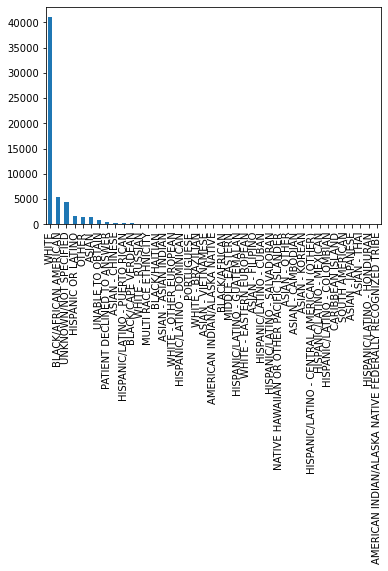

In [30]:
group = df.groupby('gender')
for label, data in group:
    print(label) #this indicates the grouping
    print('-'*70)
    print(data) #this is a dataframe for that 
    print('\n')
    
group.hospital_expire_flag.mean()

df['ethnicity'].value_counts().plot(kind='bar')
#plt.hist(group.hospital_expire_flag.mean())
#plt.xlabel('percentage of deaths')
#plt.ylabel('group')
#plt.title('Histogram of mortality', fontsize = 20)

#stats.f_oneway(sepal_len_setosa, sepal_len_vers, sepal_len_virg)

#group.size()

In [14]:
#correlation matrix
#correlation_matrix = df.corr(method='pearson')
#sns.heatmap(correlation_matrix, vmax=1.0, vmin=-1.0,square=True, cmap='viridis')
#correlation_matrix